In [ ]:
import pandas as pd
import sklearn.metrics as met
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn import preprocessing
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Testing of Research's Hypotheses

Description

# Table of Contents

1. [Hypothesis 1](#h1)


2. [Hypothesis 2](#h2)


3. [Hypothesis 3](#h3)


4. [Hypothesis 4](#h4)

In [ ]:
# Function to print evaluation metrics

def print_metrics(predictions, y_test, name='model'):
    f2 = met.fbeta_score(y_test, predictions, beta=2)
    print('F2: {}'.format(round(f2,3)))
    recall = met.recall_score(y_test, predictions)
    print('Recall: {}'.format(round(recall,3)))
    precision = met.precision_score(y_test, predictions)
    print('Precision: {}'.format(round(precision,3)))
    acc = met.accuracy_score(y_test, predictions)
    print('Accuracy: {}'.format(round(acc,3)))

In [ ]:
# Plot results used to calculate the grand mean of metrics

def plot_series(met_list, name='metric'):
  mean = statistics.mean(met_list)
  plt.plot([0, len(met_list)], [mean, mean], linestyle='--', label='mean')
  plt.plot(met_list, label='series')
  plt.xlabel('series')
  plt.ylabel(name)
  plt.ylim(0,1)
  plt.show

  print('The variance is: ' + str(np.var(met_list)))

In [ ]:
def get_important_ft(feature_names, coeficients, number=0, group=None, display=True, signs=False):
    checked = []
    if number == 0:
        number = len(feature_names)
    features = {}
    for ft, coef in zip(feature_names,coeficients):
        features[ft] = abs(coef)

    ordered_ft = dict(sorted(features.items(), key=lambda item: item[1], reverse =True))

    if signs == True:
      ordered_signs_ft = {}
      for ft, coef in ordered_ft.items():
        for value in coeficients:
          if abs(value)==coef:
            ordered_signs_ft[ft] = value
      ordered_ft = ordered_signs_ft

    i = 0
    if group == None:
      for ft, coef in ordered_ft.items():
          if display == True:
            print('{}.- {}'.format(i,ft))
            print(coef)
            print()
          i = i+1
          if i == number:
              break
    else:
      for ft, coef in ordered_ft.items():
          if ft in group:
            if display == True:
              print('{}.- {}'.format(i,ft))
              print(coef)
              print()
            checked.append(ft)
          i = i+1
          if i == number or len(checked)==len(group):
              break

    return ordered_ft

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
reduced_06_16 = pd.read_csv('drive/MyDrive/dataset_reduced_06_16.csv')
reduced_11_16 = pd.read_csv('drive/MyDrive/dataset_reduced_11_16.csv')
complete_06_16 = pd.read_csv('drive/MyDrive/dataset_complete_06_16.csv')


In [ ]:
print(len(reduced_06_16['Gentrified_06_16'][reduced_06_16['Gentrified_06_16'] == True])/len(reduced_06_16['Gentrified_06_16']))
print(len(reduced_11_16['Gentrified_11_16'][reduced_11_16['Gentrified_11_16'] == True])/len(reduced_11_16['Gentrified_11_16']))

0.12712605695402857
0.11011760132179998


In [ ]:
print(len(reduced_06_16['Gentrified_06_16'][reduced_06_16['Gentrified_06_16'] == True]))
print(len(reduced_11_16['Gentrified_11_16'][reduced_11_16['Gentrified_11_16'] == True]))

1308
1133


In [ ]:
pos_06 = reduced_06_16.loc[reduced_06_16['Gentrified_06_16'] == True, ['SA1_MAINCO']]
pos_11 = reduced_11_16.loc[reduced_11_16['Gentrified_11_16'] == True, ['SA1_MAINCO']]
i=0
for tract in list(pos_11['SA1_MAINCO']):
  if tract in list(pos_06['SA1_MAINCO']):
    i = i+1
print(i)

850


In [ ]:
reduced_06_16 = pd.read_csv('drive/MyDrive/dataset_reduced_06_16.csv')

# Normalize dataset
scaler_R = preprocessing.MinMaxScaler()
X_06R = reduced_06_16.drop(columns = ['Unnamed: 0','SA1_MAINCO','Gentrified_06_16'], axis=1)
X_06R[X_06R.columns] = scaler_R.fit_transform(X_06R)

# Split dataset
X_06R_train, X_06R_test, y_06R_train, y_06R_test = train_test_split(X_06R,
                                                                      reduced_06_16['Gentrified_06_16'], 
                                                                      test_size=0.10,
                                                                      random_state=0)

# Class wights fixed to the proportion of positives and negtives

y_06 = reduced_06_16['Gentrified_06_16']
int_ratio_06 = round(100*len(y_06[y_06 == True])/ len(y_06))

cw_06 = {False: int_ratio_06, True: 100-int_ratio_06}

# metrics

metrics = [tf.keras.metrics.Recall(),
           tf.keras.metrics.Accuracy(),
           tf.keras.metrics.Precision(),
           ]

INFO:tensorflow:Assets written to: /content/FFNN_06R/model_0/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_1/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_2/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_3/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_4/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_5/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_6/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_7/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_8/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_9/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_10/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_11/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_12/assets
INFO:tensorflow:Assets written to: /content/FFNN_06R/model_13/assets
INFO:tensorflow:Assets written to: /content/

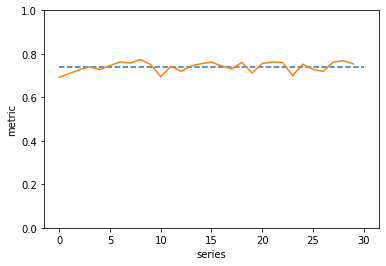

In [ ]:
model = Sequential()
model.add(Dense(105, input_dim = X_06R_train.shape[1], activation='selu'))
model.add(Dense(105, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(105, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(105, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=metrics,)

precision_06R = []
acc_06R = []
f2_06R = []
recall_06R = []
for i in range(30):

  history = model.fit(x=X_06R_train, 
                    y=y_06R_train, 
                    epochs=50,
                    batch_size=2000,
                    class_weight=cw_06,
                    verbose=0)
  
  model.save("/content/FFNN_06R/model_" + str(i))
                    
  f2_06R.append(met.fbeta_score(y_06R_test, model.predict(X_06R_test).round(), beta=2))
  recall_06R.append(met.recall_score(y_06R_test, model.predict(X_06R_test).round()))
  precision_06R.append(met.precision_score(y_06R_test, model.predict(X_06R_test).round()))
  acc_06R.append(met.accuracy_score(y_06R_test, model.predict(X_06R_test).round()))

print('F2: ' + str(statistics.mean(f2_06R)))
print('recall: ' + str(statistics.mean(recall_06R)))
print('precision: ' + str(statistics.mean(precision_06R)))
print('accuracy: ' + str(statistics.mean(acc_06R)))

plot_series(f2_06R)

In [ ]:
#!zip -r /content/FFNN_06R.zip /content/FFNN_06R

In [ ]:
median_F2 = sorted(f2_06R)[15]
print('F2: ' + str(median_F2))
for i in range(len(f2_06R)):
  if f2_06R[i] == median_F2:
    print('model {} is the median'.format(i))
    break

In [ ]:
FFNN_06R = tf.keras.models.load_model('drive/MyDrive/model_5')

## Hypothesis 1 <a name="h1"></a>

The neighborhoods around stations experience different levels of porpension to gentrification influenced by the station’s topological properties within the  public  transport  network.

In [ ]:
# plot the distribution of the centrality features for negative and positive instances in predictions

tracts_prob = FFNN_06R.predict(X_06R)
tracts = X_06R
tracts['ID'] = reduced_06_16['SA1_MAINCO']
tracts['label'] = reduced_06_16['Gentrified_06_16']
tracts['probability'] = tracts_prob
tracts['prediction'] = tracts_prob.round()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

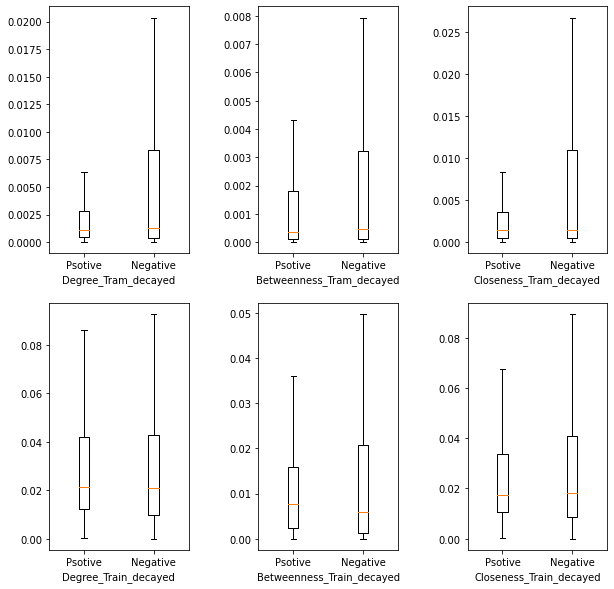

In [ ]:
topo_ft = ['Degree_Tram_decayed',
           'Betweenness_Tram_decayed',
           'Closeness_Tram_decayed',
           'Degree_Train_decayed',
           'Betweenness_Train_decayed',
           'Closeness_Train_decayed']

fig, axs = plt.subplots(2, 3, figsize=(10,10))
plt.subplots_adjust(wspace=.5, hspace=0.2)


for ft, ax in zip(topo_ft, axs.flat):
  positives = tracts.loc[(tracts['label'] == True),[ft, 'probability']]
  negatives = tracts.loc[(tracts['label'] == False),[ft, 'probability']]

  ax.boxplot([positives[ft],negatives[ft]],showfliers=False, labels =['Psotive','Negative'])
  ax.set_xlabel(ft)

The means of the gorups of positive and negative instances in each feature are very similar. Therefore, the rest of the data exploration needs to happen based on distribution. It is already visible that the distributions overlap and dont offer a distinguisbale binary relation between the topological featur and the label.

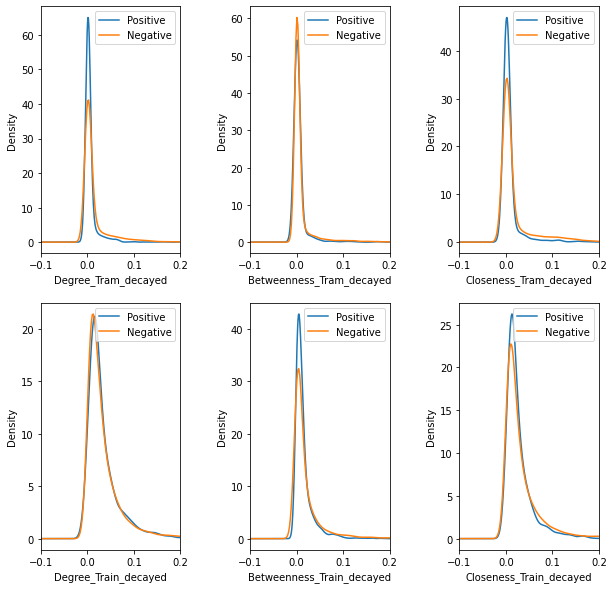

In [ ]:

fig, axs = plt.subplots(2, 3, figsize=(10,10))
plt.subplots_adjust(wspace=.5, hspace=0.2)


for ft, ax in zip(topo_ft, axs.flat):
  positives = tracts.loc[(tracts['label'] == True),[ft, 'probability']]
  negatives = tracts.loc[(tracts['label'] == False),[ft, 'probability']]

  positives[ft].plot.kde(ax=ax)
  negatives[ft].plot.kde(ax=ax)
  ax.set(xlabel=ft)
  ax.legend(labels=['Positive', 'Negative'], loc='upper right')
  ax.set_xlim([-0.1, 0.2])

It can be confirmed that the distribution overlap and it is not possible to distinguish binary relationships between the label and the topological features.

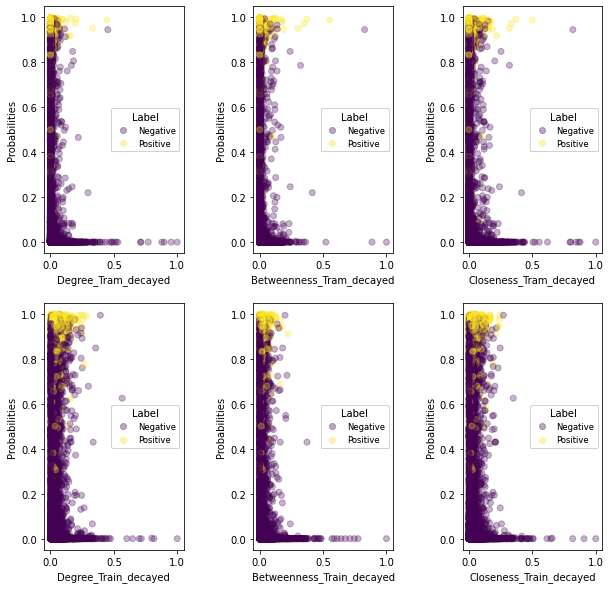

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10,10))
plt.subplots_adjust(wspace=.5, hspace=0.2)

for ft, ax in zip(topo_ft, axs.flat):

  scatter = ax.scatter(y=tracts['probability'], x=tracts[ft], 
            c=tracts['label'], alpha = 0.3)
  legend = ax.legend(*scatter.legend_elements(num=1), 
                    loc="center right", title="Label", fontsize = 'small')
  legend.get_texts()[0].set_text('Negative')
  legend.get_texts()[1].set_text('Positive')
  ax.add_artist(legend)
  ax.set(xlabel=ft)
  ax.set(ylabel='Probabilities')


After training the FFNN as the best performing model one can proceed to analyze the isolated effect these topological features have over the probability of being gentrified.  It is evident that the topological features sourced from the train network are more slightly more sparsley scattered along the feature axis but this is a consequence of the border reach the train network has over the tracts in Greater Melbourne.

No significant conclusion can be drawn from the data exploration of the festures linked to the labels.

Now, we can assess the importnces of each feature in the context of the best performing model as opposed to the previous analysis based on isolated binary correlations.

In the followwing section, the FFNN trained on the reduced demographic dataset is treated as a regression model rather than a classificastion model. The function permutation_importances does not support a classification metric with a model that predicts probabilities. Instead the reference to calculate the importances is the direct outcome in probabilities of the training dataset.

{'M_Total_Profess': 0.05537359341979027, 'Total_Fam_HH_': 0.05531460791826248, 'F_Lone_Person_Tot': 0.04738076850771904, 'Degree_Train_decayed': 0.04561934769153595, 'Closeness_Train_decayed': 0.04132412225008011, 'M_Lone_Person_Tot': 0.03825002163648605, 'O_P_F_Tot_F': 0.035026296973228455, 'Sep_House_Dw': 0.03064645081758499, 'M_Total_Managers': 0.029235587641596793, 'M_Total_Machin_Oper_Drive': 0.027385616302490236, 'One_Meth_Total_One_Meth_P': 0.026458195969462396, 'F_Total_Total': 0.025145260989665984, 'F_Total_Cler_Admin_Work': 0.023312440142035484, 'Couple_F_No_Child_P': 0.021522173658013344, 'Being_Pur_Separate_House': 0.019766367971897125, 'M_Total_Sales_Work': 0.018234919011592864, 'F_Total_Profess': 0.01683659218251705, 'Total_Non_Fam_HH': 0.014630104042589664, 'F_Total_Sales_Work': 0.013409764878451825, 'Se_De_Ro_Ter_H_TH_Tot_Dw': 0.013146556168794631, 'N_Mot_Veh_P_Dwell_2_Dwell': 0.013034467957913876, 'One_Meth_Car_As_Driver_P': 0.012651710025966167, 'Fl_U_Ap_One_Two_St_Bl

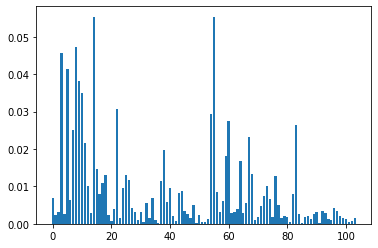

In [ ]:
y_imp = FFNN_06R.predict(X_06R_train)

ftwo_scorer = met.make_scorer(met.fbeta_score, beta=2)
results = permutation_importance(FFNN_06R, X_06R_train, y_imp, scoring='neg_mean_squared_error')
importance = results.importances_mean

get_important_ft(list(X_06R_train.columns), importance, group=topo_ft)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Two of the topological feature show to be in the top 5 of the ranking of permutation importances. 3 are in the most meaninful half of features.

Along the same logic, that is working with the effects of a feature in the context of the presence or calculations made collaborately with the rest of the features, we proceed with the analysis of variance. Here, we use a random forest to determine th eimportance of the features regardless of the chosen model but rather focused on the individual variance a feature carries.

In [ ]:
scaler_C = preprocessing.MinMaxScaler()
X_06C = complete_06_16.drop(columns = ['Unnamed: 0','SA1_MAINCO','Gentrified_06_16'], axis=1)
X_06C[X_06C.columns] = scaler_C.fit_transform(X_06C)

# Split dataset
X_06C_train, X_06C_test, y_06C_train, y_06C_test = train_test_split(X_06C,
                                                                      complete_06_16['Gentrified_06_16'], 
                                                                      test_size=0.10,
                                                                      random_state=0)
RF_06C = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                max_features=0.6,
                                class_weight='balanced_subsample',
                                random_state=0
                                )
RF_06C.fit(X_06C_train, y_06C_train)
rf_importances = RF_06C.feature_importances_


        

{'M_Total_Managers': 0.09279787548718285, 'N_Mot_Veh_P_Dwell_None_Dwell': 0.05827441997560026, 'M_Total_Profess': 0.05764718458470115, 'Unnamed: 0.1': 0.047202084694140306, 'Fully_Own_Total': 0.03536877855052149, 'N_Mot_Veh_P_Dwell_1_Dwell': 0.016190110476190095, 'O_P_F_Tot_F': 0.014900942751787709, 'Betweenness_Train_decayed': 0.013379120782824399, 'F_Total_Profess': 0.012984471455742795, 'Aged_65_69_P': 0.012801907489027037, 'Degree_Train_decayed': 0.010642071035444955, 'Fully_Own_Separate_House': 0.01056143442503199, 'Closeness_Tram_decayed': 0.01024621806327316, 'Closeness_Train_decayed': 0.00893407422376046, 'State_Terr_Hous_Autho_Total': 0.008230796459044667, 'Aged_70_74_P': 0.007115282228929145, 'Aged_75_79_P': 0.006708293129589125, 'M_Lone_Person_Tot': 0.006658728623289991, 'M_45_54_Yrs_Profess_': 0.006472105098039811, 'China_ex_SARs_Taiwan_Prov_P': 0.006292890123880472, 'Rent_Total_Sep_House': 0.006176922662101257, 'F_15_19_Yrs_Total': 0.0061709669418469025, 'Russian_Tot_R': 0

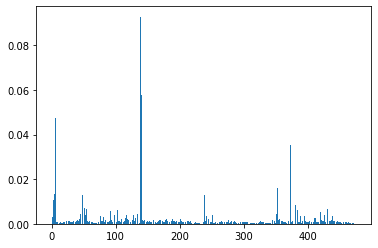

In [ ]:

get_important_ft(list(X_06C_train.columns), rf_importances, group=topo_ft, display='off')
plt.bar([x for x in range(len(rf_importances))], rf_importances)
plt.show()

The magnitude of the coefficients in the LRC is a reflection of the influence, negative or positive, that each feature has on the possibility of a tract becoming gentrified. This interpretation of the coefficients is only valid when the features have been normalized. Otherwise, large coefficients would compensate for small values in the data. Such a simple interpretation of the coefficients in a logistic regression would only hold if the distribution of the features were somewhat similar. However, the topological features are heavily composed of small numbers as a result of the decay function. Consequently, a large coefficient tries partially to make these features visible but not necessarily stand out.

0.- Closeness_Train_decayed
-10.578357816595103

1.- Degree_Train_decayed
9.633828889487685

25.- Betweenness_Tram_decayed
2.7697394112513463

32.- Degree_Tram_decayed
-2.2083567240299207

56.- Betweenness_Train_decayed
-1.5075477997472935

274.- Closeness_Tram_decayed
0.0



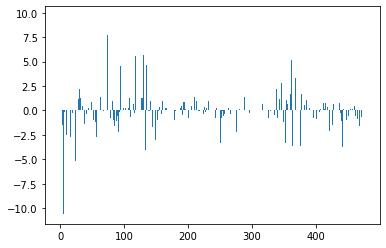

In [ ]:

LR_06C = LogisticRegression(class_weight='balanced',
                           penalty = 'l1',
                           solver='liblinear')

LR_06C.fit(X_06C_train, y_06C_train)

lr_coef = LR_06C.coef_[0]
get_important_ft(list(X_06C_train.columns), lr_coef, group=topo_ft, signs=True)
plt.bar([x for x in range(len(lr_coef))], lr_coef)
plt.show()

## Hypothesis 2 <a name="h2"></a>


The second hypothesis is that neighborhoods with no predisposition to gentrification can have it induced upon them with the development of public transport infrastructure.

Roxburgh Park 40220
Southland 52095
Coolaroo 44817

In [ ]:
#predict probabilities for tracts around 3 new stations in 2006 and 2011 and compare

# Get closest station and distance in the train network
closest_station_11_16 = pd.read_csv('drive/MyDrive/tracts_closest_tram_train_stops_2016.csv')

#Filter for the 2 stations built between 2006 and 2011 and the standard access distance
new_stations = closest_station_11_16.loc[((closest_station_11_16['closest_stop_Train']==40220) |
                                    (closest_station_11_16['closest_stop_Train']==44817)) &
                                    (closest_station_11_16['dist_closest_stop_Train']<=800)]

# Normalize dataset from 2011
scaler_R = preprocessing.MinMaxScaler()
X_11R = reduced_11_16.drop(columns = ['Unnamed: 0','SA1_MAINCO','Gentrified_11_16'], axis=1)
X_11R[X_11R.columns] = scaler_R.fit_transform(X_11R)

#Add tracts IDs to select the features of relevant tracts
X_06R['SA1_MAINCO'] = reduced_06_16['SA1_MAINCO']
X_11R['SA1_MAINCO'] = reduced_11_16['SA1_MAINCO']

#filter features
X_06R_new_stations = pd.merge(X_06R, 
                                      new_stations[['SA1_MAINCO']], 
                                      how='right',
                                      on='SA1_MAINCO')

X_11R_new_stations = pd.merge(X_11R, 
                                      new_stations[['SA1_MAINCO']], 
                                      how='right',
                                      on='SA1_MAINCO')
#dispose IDs for prediction process
X_06R_new_stations.drop(columns = ['SA1_MAINCO'], axis=1, inplace=True)
X_11R_new_stations.drop(columns = ['SA1_MAINCO'], axis=1, inplace=True)

In [ ]:
prob_06_NS = [x[0] for x in FFNN_06R.predict(X_06R_new_stations)]
prob_11_NS = [x[0] for x in FFNN_06R.predict(X_11R_new_stations)]

In [ ]:
remained = []
changed = []
increment = []
for ID, tract_06, tract_11 in zip(new_stations['SA1_MAINCO'],prob_06_NS,prob_11_NS):
  increment.append(tract_11-tract_06)
  if tract_06.round() == tract_11.round():
    remained.append(ID)
  else:
    changed.append(ID)
print('{} tracts changed predicted status'.format(len(changed)))
print('the average change in probability is {}'.format(statistics.mean(increment)))
print('the median change in probability is {}'.format(statistics.median(increment)))

In [ ]:

plt.figure()
plt.boxplot([prob_06_NS, prob_11_NS], labels =['2006','2011']) #showfliers=False
plt.xlabel('year')
plt.ylabel('Probability')
plt.show

In [ ]:
plt.figure()
plt.scatter(x=new_stations['dist_closest_stop_Train'],
            y=prob_06_NS,
            label='2006')
plt.scatter(x=new_stations['dist_closest_stop_Train'],
            y=prob_11_NS,
            label='2011')
plt.plot([200,800],[0.5,0.5],linestyle='--', color='red')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend(loc='center right')
plt.show()

In [ ]:
#plot prob vs distance 

## Hypothesis 4 <a name="h4"></a>

### Gentrification Fingerprint

Collection of features that appear in all three feature-importance tests. The choice to part from the top 50 features in each test is illustrative, it can be expanded or reduced accordingly.


In [ ]:
FFNN_ordered_ft = get_important_ft(list(X_06R_train.columns), importance, display = False)
RF_ordered_ft = get_important_ft(list(X_06C_train.columns), rf_importances, display = False)
LR_ordered_ft = get_important_ft(list(X_06C_train.columns), lr_coef, display = False, signs=True)

{'M_Total_Profess': 0.05537359341979027, 'Total_Fam_HH_': 0.05531460791826248, 'F_Lone_Person_Tot': 0.04738076850771904, 'Degree_Train_decayed': 0.04561934769153595, 'Closeness_Train_decayed': 0.04132412225008011, 'M_Lone_Person_Tot': 0.03825002163648605, 'O_P_F_Tot_F': 0.035026296973228455, 'Sep_House_Dw': 0.03064645081758499, 'M_Total_Managers': 0.029235587641596793, 'M_Total_Machin_Oper_Drive': 0.027385616302490236, 'One_Meth_Total_One_Meth_P': 0.026458195969462396, 'F_Total_Total': 0.025145260989665984, 'F_Total_Cler_Admin_Work': 0.023312440142035484, 'Couple_F_No_Child_P': 0.021522173658013344, 'Being_Pur_Separate_House': 0.019766367971897125, 'M_Total_Sales_Work': 0.018234919011592864, 'F_Total_Profess': 0.01683659218251705, 'Total_Non_Fam_HH': 0.014630104042589664, 'F_Total_Sales_Work': 0.013409764878451825, 'Se_De_Ro_Ter_H_TH_Tot_Dw': 0.013146556168794631, 'N_Mot_Veh_P_Dwell_2_Dwell': 0.013034467957913876, 'One_Meth_Car_As_Driver_P': 0.012651710025966167, 'Fl_U_Ap_One_Two_St_Bl

In [ ]:
limit = 50
three_occ = {}
i=0
for ft1, imp1 in FFNN_ordered_ft.items():
  if i==limit:
    break
  j=0
  for ft2, imp2 in RF_ordered_ft.items():
    if j==limit:
      break
    if ft2==ft1:
      k=0
      for ft3, imp3 in LR_ordered_ft.items():
        if k==limit:
          break
        if ft3==ft2:
          three_occ[ft3]=[imp1,imp2,imp3]
          break
    
        k=k+1
    j=j+1
  i=i+1
for ft, imps in three_occ.items():
  print(ft)

F_Lone_Person_Tot
Degree_Train_decayed
Closeness_Train_decayed
M_Lone_Person_Tot
O_P_F_Tot_F
M_Total_Managers
N_Mot_Veh_P_Dwell_1_Dwell
One_Meth_Bus_P
N_Mot_Veh_P_Dwell_None_Dwell
Degree_Tram_decayed
Fully_Own_Separate_House
Fl_U_Ap_Three_St_Bl_Dw
